# Cleaning Data in Python
Run the hidden code cell below to import the data used in this course.

In [1]:
# Import the course packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import missingno as msno
import fuzzywuzzy
import recordlinkage 

# Import the course datasets
ride_sharing = pd.read_csv('datasets/ride_sharing_new.csv', index_col = 'Unnamed: 0')
airlines = pd.read_csv('datasets/airlines_final.csv',  index_col = 'Unnamed: 0')
banking = pd.read_csv('datasets/banking_dirty.csv', index_col = 'Unnamed: 0')
restaurants = pd.read_csv('datasets/restaurants_L2.csv', index_col = 'Unnamed: 0')
restaurants_new = pd.read_csv('datasets/restaurants_L2_dirty.csv', index_col = 'Unnamed: 0')

## Explore Datasets
Use the DataFrames imported in the first cell to explore the data and practice your skills!
- For each DataFrame, inspect the data types of each column and, where needed, clean and convert columns into the correct data type. You should also rename any columns to have more descriptive titles.
- Identify and remove all the duplicate rows in `ride_sharing`.
- Inspect the unique values of all the columns in `airlines` and clean any inconsistencies.
- For the `airlines` DataFrame, create a new column called `International` from `dest_region`, where values representing US regions map to `False` and all other regions map to `True`.
- The `banking` DataFrame contains out of date ages. Update the `Age` column using today's date and the `birth_date` column.
- Clean the `restaurants_new` DataFrame so that it better matches the categories in the `city` and `type` column of the `restaurants` DataFrame. Afterward, given typos in restaurant names, use record linkage to generate possible pairs of rows between `restaurants` and `restaurants_new` using criteria you think is best.


# Common Data Problems

In [2]:
ride_sharing.head()

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


In [3]:
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   duration         25760 non-null  object
 1   station_A_id     25760 non-null  int64 
 2   station_A_name   25760 non-null  object
 3   station_B_id     25760 non-null  int64 
 4   station_B_name   25760 non-null  object
 5   bike_id          25760 non-null  int64 
 6   user_type        25760 non-null  int64 
 7   user_birth_year  25760 non-null  int64 
 8   user_gender      25760 non-null  object
dtypes: int64(5), object(4)
memory usage: 2.0+ MB


In [5]:
#since user_type is int64 although it is a categorical value
#visualizing the stats
print(ride_sharing["user_type"].describe())

#correcting into categorical value
ride_sharing["user_type"] = ride_sharing["user_type"].astype("category")
print(ride_sharing.info())

#now again visualizing the statistics
print(ride_sharing["user_type"].describe())

count     25760
unique        3
top           2
freq      12972
Name: user_type, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25760 entries, 0 to 25759
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   duration         25760 non-null  object  
 1   station_A_id     25760 non-null  int64   
 2   station_A_name   25760 non-null  object  
 3   station_B_id     25760 non-null  int64   
 4   station_B_name   25760 non-null  object  
 5   bike_id          25760 non-null  int64   
 6   user_type        25760 non-null  category
 7   user_birth_year  25760 non-null  int64   
 8   user_gender      25760 non-null  object  
dtypes: category(1), int64(4), object(4)
memory usage: 1.8+ MB
None
count     25760
unique        3
top           2
freq      12972
Name: user_type, dtype: int64


## .strip() method

In [6]:
#to calculate the total duration
print(ride_sharing["duration"].sum()) 

12 minutes24 minutes8 minutes4 minutes11 minutes10 minutes16 minutes9 minutes21 minutes5 minutes19 minutes6 minutes7 minutes187 minutes13 minutes4 minutes32 minutes5 minutes16 minutes17 minutes16 minutes11 minutes10 minutes3 minutes11 minutes3 minutes12 minutes7 minutes5 minutes6 minutes6 minutes9 minutes12 minutes16 minutes11 minutes11 minutes4 minutes5 minutes6 minutes7 minutes4 minutes12 minutes3 minutes3 minutes2 minutes1 minutes7 minutes8 minutes15 minutes9 minutes11 minutes16 minutes13 minutes14 minutes12 minutes11 minutes5 minutes11 minutes10 minutes10 minutes10 minutes8 minutes4 minutes5 minutes10 minutes10 minutes5 minutes19 minutes19 minutes20 minutes38 minutes9 minutes13 minutes20 minutes5 minutes11 minutes18 minutes9 minutes15 minutes14 minutes22 minutes3 minutes4 minutes12 minutes79 minutes78 minutes80 minutes5 minutes6 minutes11 minutes7 minutes7 minutes22 minutes9 minutes9 minutes10 minutes6 minutes14 minutes18 minutes14 minutes9 minutes10 minutes11 minutes7 minutes10 mi

In [8]:
#since "minutes" is attached to the duration, its sum is concatenated into a larger string
#using .strip()
ride_sharing["duration"] = ride_sharing["duration"].str.strip("minutes")

#converting object type of "duration" into string for calulation
ride_sharing["duration"] = ride_sharing["duration"].astype(int)

#now calculating the total duration
print(ride_sharing["duration"].sum())

293382


## Uniqueness Constraints

In [13]:
#check duplicates using .duplicated() method
duplicates = ride_sharing.duplicated(subset="bike_id",keep=False)
duplicated = ride_sharing[duplicates].sort_values("bike_id")
print(duplicated[["bike_id","duration","user_birth_year"]])

       bike_id  duration  user_birth_year
3638        11        12             1988
6088        11         5             1985
10857       11         4             1987
10045       27        13             1989
16104       27        10             1970
...        ...       ...              ...
8812      6638        10             1986
6815      6638         5             1995
8456      6638         7             1983
8300      6638         6             1962
8380      6638         8             1984

[25717 rows x 3 columns]


In [14]:
#drop complete duplicates
ride_sharing.drop_duplicates()

,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,12,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,24,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,8,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,4,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,11,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male
...,...,...,...,...,...,...,...,...,...
25755,11,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5063,1,2000,Male
25756,10,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5411,2,1998,Male
25757,14,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),5157,2,1995,Male
25758,14,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),4438,2,1995,Male


# Text and categorical data problems

## Membership Constraints
set(left_dataframe_column).difference(right_dataframe_column)

- set() method --> set of unique values
- .difference() method --> subtracts left_dataframe_column by right_dataframe_column, only leaving the values of left_dataframe_column that are not common in both columns 

## Categorical Variables
White spaces and inconsistency 
- .str.upper()
- .str.lower()
- .str.strip()

Creating or remapping categories
- pd.cut() : dataframe["column_name"] , bins = range , labels = label of each range
- pd.qcut()
- .replace() : dict of key to be replaced by values

# Advanced Data Problems

## Uniformity
![image](image.png)

**Verifying unit uniformity is imperative to having accurate accuracy**

- Convert the account_opened column to datetime, while making sure the date format is inferred and that erroneous formats that raise error return a missing value.

In [6]:
banking["account_opened"] = pd.to_datetime(banking["account_opened"], 
                                          #If 'coerce', then invalid parsing will be set as NaT
                                          errors = "coerce",
                                          #If True and no format is given, attempt to infer 
                                          infer_datetime_format = True)

## Cross Field Validation

In [2]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis=1) == banking["inv_amount"]

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


## Completeness

cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
dtype: int64


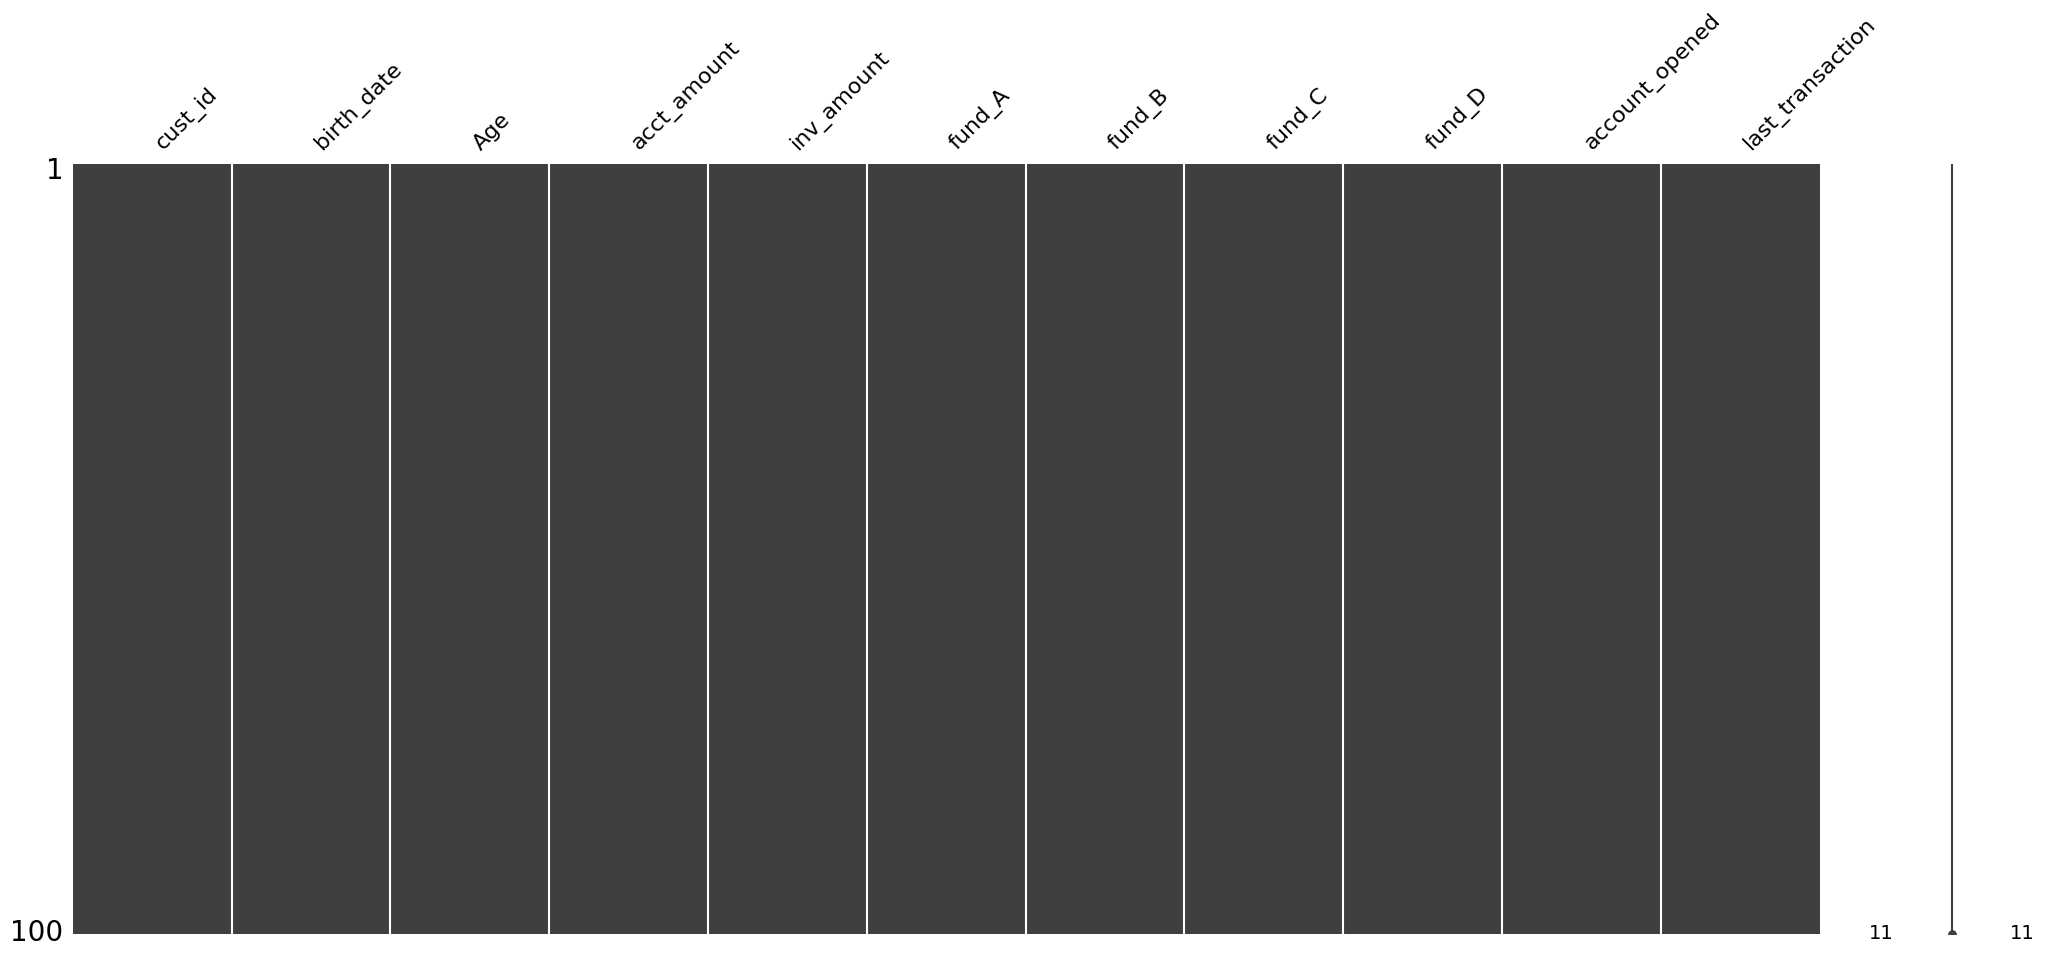

In [4]:
# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Record Linkage
![image-6](image-6.png)


## Minimum edit distance 
Minimum steps that include **insertion, deletion, substitution and transposition** of one word to another

- Use Levenstein Algorithm -> from **thefuzz** package

## Collapsing all the typo strings 
![image-2](image-2.png)


- when comparing a string with an array of strings using process.extract(), the output is a list of tuples where each is formatted like:

      (closest match, similarity score, index of match)

## Generating pairs
![image-3](image-3.png)

Note: blocking "indexer.block()" creates pairs based on the blocking value 
## Comparing the Dataframes
![image-4](image-4.png)
## Output
![image-5](image-5.png)

	Note: 0 when comparing Dataframes, conditions are not satisfied 
	      1 when comparing Dataframes, conditions are satisfied

## Linking DataFrames

**1. Probable Matches**

![image-7](image-7.png)

	Note: If all the row matches, its most likely duplicates

**2. Get the indices**

![image-8](image-8.png)

**3. Linking Data by removing duplicates**

![image-9](image-9.png)
